#  Stock Price Prediction

 **1: Objective**
- The objective of this project is to use historical stock market data to predict  
the **next trading day's closing price** using Machine Learning techniques.

 **2: Dataset**
- The dataset is obtained from **Yahoo Finance** using the `yfinance` Python library.
 
 **3: Selected Stock**
- Apple Inc. (AAPL)

 **4: Machine Learning Model**
- Linear Regression

 **5: Features Used**
- Open Price  
- High Price  
- Low Price  
- Trading Volume


> **Note:** Required libraries such as `yfinance` must be installed before running this notebook.


  **6: Import Required Libraries:**

This step imports all the necessary Python libraries required for:
- Data handling
- Data visualization
- Machine Learning model training and evaluation


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


 **7: Load Historical Stock Data:**

Historical stock data is downloaded directly from Yahoo Finance using the
`yfinance` library. The dataset contains daily market information such as
Open, High, Low, Close prices, and trading Volume.


In [4]:
stock_symbol = "AAPL"

data = yf.download(stock_symbol, start="2018-01-01", end="2024-01-01")

data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341888,40.351258,39.639313,39.850088,102223600
2018-01-03,40.334862,40.878189,40.271633,40.405120,118071600
2018-01-04,40.522221,40.625266,40.299739,40.407465,89738400
2018-01-05,40.983582,41.070231,40.526908,40.618243,94640000
2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200


*Explanation of **Historical Stock Data** output:*

This table shows Apple (AAPL) historical stock data from 2018–2024.Columns: Open (market start price), High (day’s highest), Low (day’s lowest), Close (market end price), Volume (shares traded).Rows: Each row represents one trading day in chronological order.Example: 2018-01-02 → Open 39.85, High 40.35, Low 39.63, Close 40.34, Volume 102M.This data is ready to be used as features (Open, High, Low, Volume) and target (Close) for predicting the next day’s stock price.

  **7: Data Preprocessing**

In this step:
- Only relevant columns are selected
- A new target variable is created to represent the next day’s closing price
- Missing values are removed

This ensures the dataset is clean and suitable for machine learning.


In [5]:
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

data['Target_Close_Next_Day'] = data['Close'].shift(-1)

data.dropna(inplace=True)

data.head()


C:\Users\User\AppData\Local\Temp\ipykernel_17340\3724486994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target_Close_Next_Day'] = data['Close'].shift(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_17340\3724486994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Price,Open,High,Low,Close,Volume,Target_Close_Next_Day
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-02,39.850088,40.351258,39.639313,40.341888,102223600,40.334862
2018-01-03,40.405120,40.878189,40.271633,40.334862,118071600,40.522221
2018-01-04,40.407465,40.625266,40.299739,40.522221,89738400,40.983582
2018-01-05,40.618243,41.070231,40.526908,40.983582,94640000,40.831356
2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200,40.826683


*Explanation of **Data Preprocessing** output:*
This table shows Apple (AAPL) stock data with Open, High, Low, Close, Volume columns.A new column Target_Close_Next_Day is added, containing the next day’s closing price for prediction.Each row represents one trading day in chronological order.Example: 2018-01-02 → Open 39.85, High 40.35, Low 39.63, Close 40.34, Volume 102M, Target 40.33 (next day Close).The last row is removed because it has no next day Close.This dataset is now ready for machine learning, with features as input and Target_Close_Next_Day as output.

  **8: Define Features and Target Variable**

The dataset is split into:
- *Features (X):* Market indicators used for prediction
- *Target (y):* Next day’s closing price

This allows the model to learn the relationship between input variables
and future stock prices.


In [6]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target_Close_Next_Day']


 **9: Train-Test Split**

The data is divided into training and testing sets:
- 80% for training the model
- 20% for evaluating model performance

This helps test the model on unseen data.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


 **10: Model Training (Linear Regression)**

A Linear Regression model is trained using the training dataset.
The model learns patterns between the market features and the target
closing price.


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


*Explanation of **Model Training** output:*
LinearRegression() creates a Linear Regression model with default settings.model.fit(X_train, y_train) trains the model on the training data.The model learns the relationship between features (Open, High, Low, Volume) and the target (next day Close).After this, the model is ready to predict next day closing prices

 **11: Model Evaluation**

The trained model is evaluated using the testing dataset.
Performance is measured using:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)


In [9]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 1.62
Root Mean Squared Error (RMSE): 2.37



 **12: Visualization – Actual vs Predicted Prices**

A line plot is created to visually compare the actual closing prices
with the predicted closing prices. This helps assess the model’s
prediction accuracy.


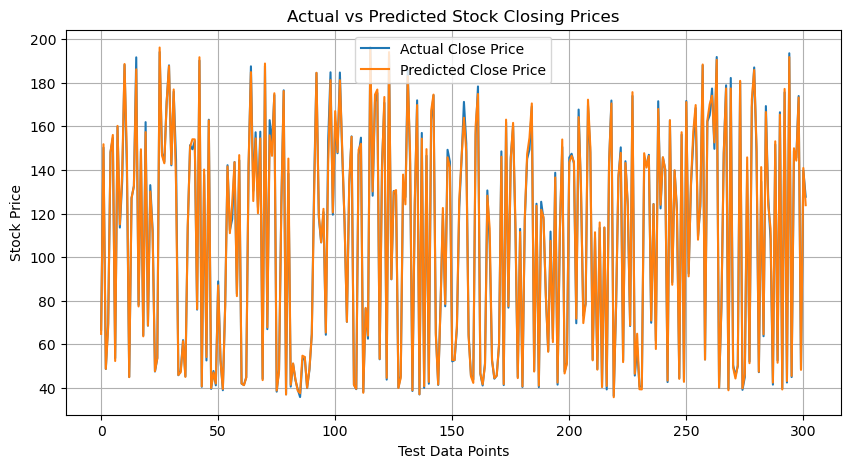

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")

plt.title("Actual vs Predicted Stock Closing Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


*Explanation of *Visualization – **Actual vs Predicted Prices** output:*
The graph shows 2 lines:
Actual Close Price → real stock prices from the test set
Predicted Close Price → prices predicted by the model
X-axis: Test data points (each day in the test set)
Y-axis: Stock price values
Purpose: To visually compare how close the model’s predictions are to the actual prices
Grid, legend, and title make the graph clear and professional

- Blue line = **actual**, Orange line = **predicted**
- Actual vs Predicted closing prices comparison visualized clearly

## 13: Conclusion

This project demonstrates an end-to-end Machine Learning pipeline
for short-term stock price prediction.

Using historical data from Yahoo Finance, a Linear Regression model
was trained to predict the next day’s closing price based on key
market indicators. The results were evaluated using error metrics
and visualized for better interpretation.
